In [3]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller


In [9]:
df=pd.read_csv('stock_data.csv', parse_dates=True, index_col='Date')

df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


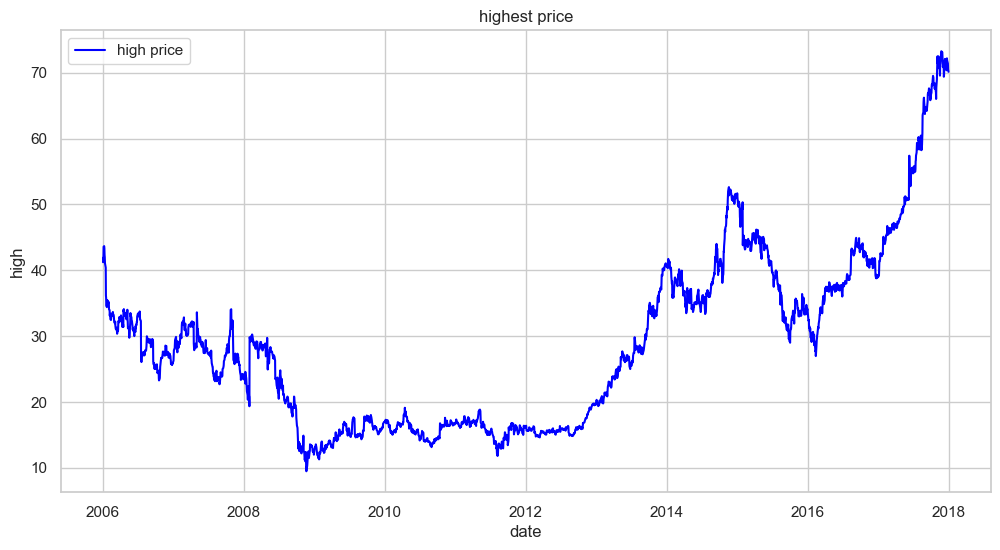

In [19]:
sb.set(style='whitegrid')

plt.figure(figsize=(12,6))

sb.lineplot(data=df, x='Date', y='High', label='high price', color='blue')


plt.xlabel('date')
plt.ylabel('high')
plt.title('highest price')
plt.show()
           

C:\Users\pc\AppData\Local\Temp\ipykernel_11288\3288914432.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.select_dtypes(include='number').resample('M').mean()


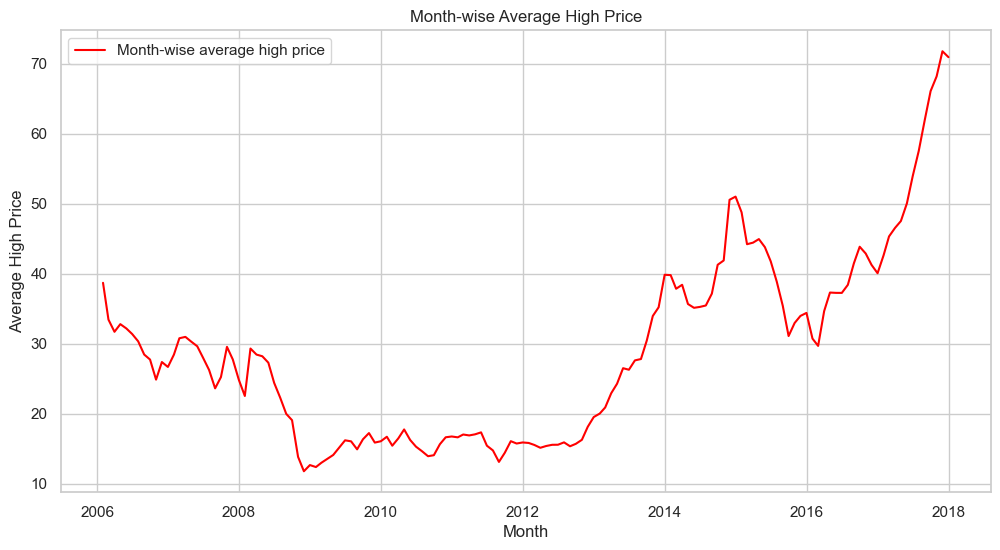

In [33]:
# Select only the numeric columns
df_resampled = df.select_dtypes(include='number').resample('M').mean()

# Set the Seaborn style
sb.set_style('whitegrid')

# Plotting the data
plt.figure(figsize=(12, 6))
sb.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month-wise average high price', color='red')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Average High Price')
plt.title('Month-wise Average High Price')
plt.legend()

plt.show()


<Figure size 1200x600 with 0 Axes>

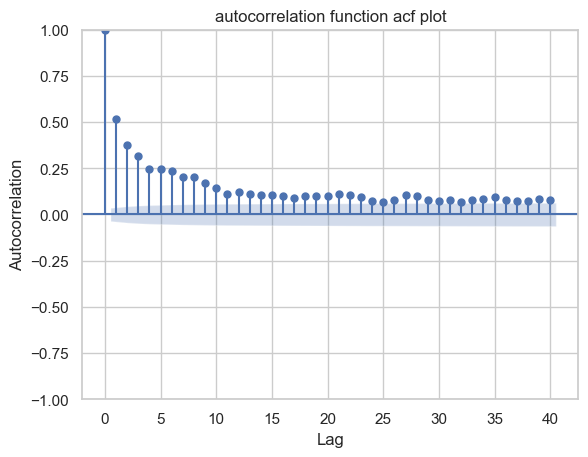

In [39]:
#df.set_index('Date', inplace=True)


plt.figure(figsize=(12,6))
plot_acf(df['Volume'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('autocorrelation function acf plot')
plt.show()

In [49]:
result=adfuller(df['High'])
print('Adf statistics', result[0])
print('p-value', result[1])
print('critical value', result[4])

Adf statistics 0.7671404880535949
p-value 0.9910868050318213
critical value {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


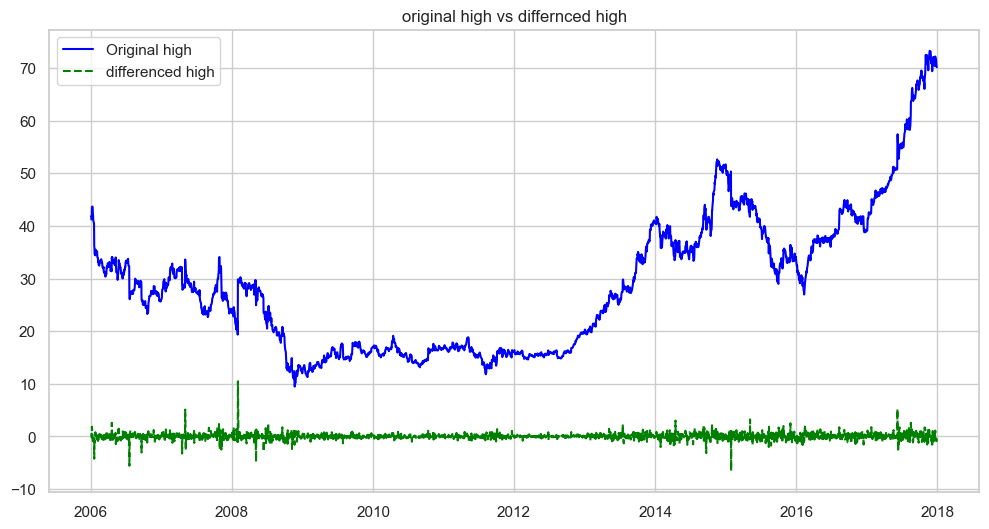

In [59]:
df['High_diff']=df['High'].diff()


plt.figure(figsize=(12,6))
plt.plot(df['High'], label='Original high', color='blue')
plt.plot(df['High_diff'], label='differenced high', linestyle='--', color='green')
plt.legend()
plt.title('original high vs differnced high')
plt.show()

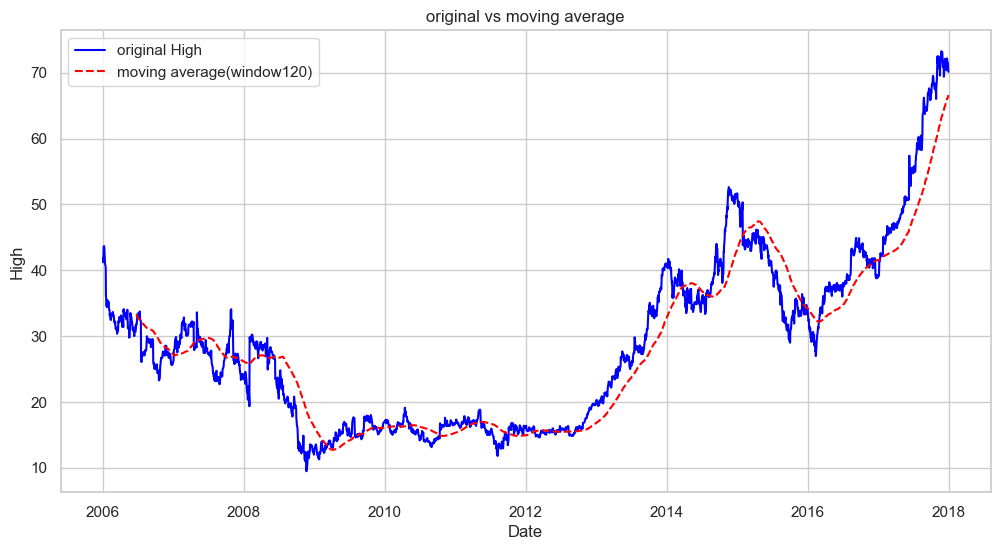

In [73]:
window_size=120
df['High_smoothed']= df['High'].rolling(window=window_size).mean()


plt.figure(figsize=(12,6))
plt.plot(df['High'], label='original High', color='blue')
plt.plot(df['High_smoothed'], label=f'moving average(window{window_size})', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('original vs moving average')
plt.legend()
plt.show()

In [83]:
df_combined=pd.concat([df['High'], df['High_diff']], axis=1)

df_combined.head()

,High,High_diff
Date,,
2006-01-03,41.22,NaN
2006-01-04,41.90,0.68
2006-01-05,41.73,-0.17
2006-01-06,43.57,1.84
2006-01-09,43.66,0.09


In [91]:
df.dropna(subset=['High_diff'], inplace=True)

df['High_diff'].head()

Date
2006-01-04    0.68
2006-01-05   -0.17
2006-01-06    1.84
2006-01-09    0.09
2006-01-10   -0.32
Name: High_diff, dtype: float64

In [93]:
result=adfuller(df['High_diff'])
print('ADF statistics', result[0])
print('p value', result[1])
print('critical value' , result[4])

ADF statistics -12.148367478343228
p value 1.5912766134150183e-22
critical value {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}
